# **Deep Learning Assignment: Convolutional Neural Network**

# Implementation of CNN for classification of Dogs and Cats

### **Introduction to Convolutional Neural Networks (CNNs)**
Convolutional Neural Networks (CNNs) represent a powerful class of deep learning models specifically designed for image processing tasks, such as image classification and pattern recognition. In this notebook, we will embark on a foundational exploration of CNNs, focusing on their core principles and practical implementation.

**CNN Architecture:**

We will delve into the architecture of CNNs, understanding the role of convolutional layers, pooling layers, and fully connected layers. This exploration will provide insights into how CNNs hierarchically extract features from input images.
**Practical Implementation:**

A step-by-step guide will be provided for implementing a basic CNN using a popular deep learning framework, emphasizing hands-on experience and code implementation. The example will focus on image classification tasks.
**Training and Evaluation:**

Learn how to train a CNN model using a dataset, evaluate its performance, and interpret key metrics. This section aims to provide a practical understanding of the training process and model evaluation.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [2]:
import os

import zipfile

with zipfile.ZipFile("train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("test1.zip","r") as z:
    z.extractall(".")

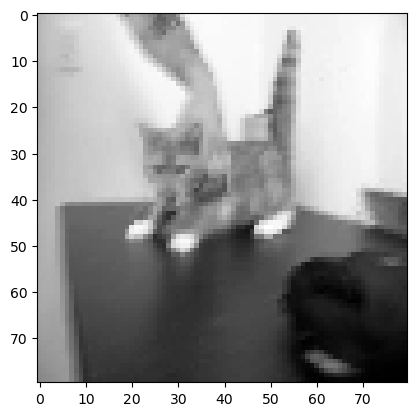

In [3]:
main_dir = ""
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [4]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    

In [5]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [6]:
#Normalize data
X = X/255.0

## **CNN model**

**Define a Sequential model**

Start adding layers to it.
First we will add a Conv2D layer with 64 nodes and kernel size of (3,3). You can also experiment with different values here like 32, 128 etc. Also we have to specify input shape which is your X shape. Activation we will take 'relu' for now however there are many others to experiment with.
Now after every Conv layer we always do max pooling so we will add max pooling layer with a size of (2,2)
We will repeat this combination again because come on 2 is better than one. Haha. We you can also add 3 or more convolution layers but keep in mind the more layers you add more time it will take to train.
But we don't have much time so we will add a flatten layer now. As we have to feed our data to Dense layer later.
We will now add a Dense layer of 64 nodes. Note for all these layers we are using activation as 'relu' because I found results better with this. You can skip specifying activation but this might make a model a conveniently linear which might not work for us.
In the end for getting our result we will add final Dense layer . Activation can be sigmoid or softmax (if you need probability use sigmoid else use softmax). Here I have used sigmoid.
Finally we will compile the model . 
There are 3 things to mention here . Loss, Optimizer, Metrics

**Loss** :- To make our model better we either minimize loss or maximize accuracy. NN always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy

**Optimizer** :- If you know a lil bit about mathematics of machine learning you might be familier with local minima or global minima or cost function. To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam

**Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [7]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


625/625 [==============================] - 70s 110ms/step - loss: 0.6251 - accuracy: 0.6558 - val_loss: 1.1108 - val_accuracy: 0.1994
Epoch 2/20
625/625 [==============================] - 69s 110ms/step - loss: 0.5162 - accuracy: 0.7471 - val_loss: 0.9918 - val_accuracy: 0.4188
Epoch 3/20
625/625 [==============================] - 69s 110ms/step - loss: 0.4608 - accuracy: 0.7814 - val_loss: 0.4696 - val_accuracy: 0.7914
Epoch 4/20
625/625 [==============================] - 72s 115ms/step - loss: 0.4113 - accuracy: 0.8102 - val_loss: 0.7948 - val_accuracy: 0.5882
Epoch 5/20
625/625 [==============================] - 71s 113ms/step - loss: 0.3556 - accuracy: 0.8424 - val_loss: 0.6264 - val_accuracy: 0.7208
Epoch 6/20
625/625 [==============================] - 69s 111ms/step - loss: 0.2943 - accuracy: 0.8712 - val_loss: 0.6841 - val_accuracy: 0.7080
Epoch 7/20
625/625 [==============================] - 69s 111ms/step - loss: 0.2288 - accuracy: 0.9068 - val_loss: 0.8433 - val_

In [9]:
final_val_accuracy = model.history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Validation Accuracy: 69.84%


In [10]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [11]:
predictions = model.predict(X_test)

391/391 [==============================] - 14s 36ms/step


In [12]:
predicted_val = [int(round(p[0])) for p in predictions]

In [13]:
id_and_predictions = list(zip(id_line, predicted_val))
print(id_and_predictions)

[('1', 0), ('10', 0), ('100', 0), ('1000', 1), ('10000', 1), ('10001', 1), ('10002', 0), ('10003', 1), ('10004', 1), ('10005', 0), ('10006', 0), ('10007', 0), ('10008', 0), ('10009', 1), ('1001', 1), ('10010', 1), ('10011', 1), ('10012', 0), ('10013', 0), ('10014', 0), ('10015', 1), ('10016', 0), ('10017', 0), ('10018', 0), ('10019', 0), ('1002', 0), ('10020', 0), ('10021', 0), ('10022', 1), ('10023', 1), ('10024', 1), ('10025', 0), ('10026', 1), ('10027', 1), ('10028', 0), ('10029', 1), ('1003', 1), ('10030', 1), ('10031', 1), ('10032', 0), ('10033', 0), ('10034', 1), ('10035', 0), ('10036', 0), ('10037', 1), ('10038', 1), ('10039', 1), ('1004', 1), ('10040', 1), ('10041', 1), ('10042', 1), ('10043', 0), ('10044', 0), ('10045', 1), ('10046', 1), ('10047', 1), ('10048', 1), ('10049', 0), ('1005', 0), ('10050', 0), ('10051', 0), ('10052', 0), ('10053', 0), ('10054', 0), ('10055', 0), ('10056', 0), ('10057', 1), ('10058', 1), ('10059', 1), ('1006', 1), ('10060', 1), ('10061', 0), ('10062